In [16]:
%matplotlib inline
from __future__ import division, print_function, absolute_import
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math

In [2]:
points = np.load("Line.Points.1000.npy")
labels = np.load("Line.Labels.1000.npy")

In [3]:
#print(points)
#print(labels)
#print(points[:-100,:].shape)

# Number of support vectors:
| C        | Gamma    | Number of Support Vectors | Accuracy | Comments |
|----------|----------|---------------------------|----------|----------|
|1         | 0.01     | 213                       | 0.98     |          |
|100       | 0.01     | 135                       | 0.99     |          |
|1         | 0.001    | 115                       | 0.99     |          |
|100       | 0.001    | 24                        | 0.99     | BEST     |
|1         | 0.0001   | 188                       | 0.99     |          |
|100       | 0.0001   | 40                        | 0.99     |          |

In [4]:
gamma=0.001
clf = SVC(C=100, gamma=gamma)
print(clf)
clf.fit(points[:-100,:], labels[:-100])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
numcorrect = 0
for (point, label) in zip(points[-100:,:], labels[-100:]):
    prediction = clf.predict([point])
#    print("Point: " + str(point) + " Label: " + str(label) + " Prediction: " + str(prediction))
    if label == prediction:
        numcorrect += 1
    else:
        print("INACCURATE PREDICTION!!: Point: " + str(point) + " Label: " + str(label) + " Prediction: " + str(prediction))
print("Accuracy: " + str(float(numcorrect)/100.0))

INACCURATE PREDICTION!!: Point: [-46. -45.] Label: 0 Prediction: [1]
Accuracy: 0.99


In [7]:
#print(clf.support_.shape)

In [8]:
print(str(clf.support_vectors_.shape))

(24, 2)


In [9]:
prediction_at_support = np.empty(clf.support_vectors_.shape[0])
i = 0
for (x, y) in clf.support_vectors_:
    prediction_at_support[i] = clf.predict([[x,y]])
    i += 1
print(prediction_at_support.shape)
print(prediction_at_support)

(24,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


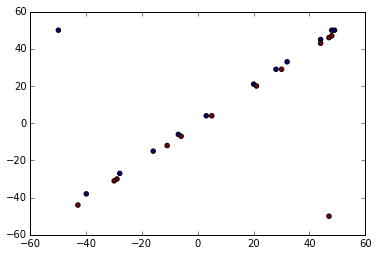

In [13]:
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], c=prediction_at_support[:] )
plt.show()

In [17]:
num_support_vectors = clf.dual_coef_.shape[1]
print(num_support_vectors)

24


In [18]:
clf.decision_function(clf.support_vectors_)

array([-0.55122525, -0.33229057, -0.99974632, -0.42225678, -1.00029954,
       -1.00024715, -0.31270236, -1.00008121, -0.99978655, -0.67772334,
       -0.55253322, -0.47928558,  0.94798013,  0.93882607,  0.99981556,
        1.00016009,  0.98646905,  1.00016077,  1.00008131,  0.6513047 ,
        0.94057225,  0.99994368,  0.652418  ,  0.39621552])

In [42]:
def gaussian_kernel_function(point1, point2, gamma):
    to_return = math.exp(-1.0*gamma*((norm(point1-point2))**2))
    #print(to_return)
    return to_return

In [59]:
def calculate_raw_prediction(point):
    #This is sum over all support vectors of alpha_i * y_i * kernel_based_dot_product(support_vector_i, point) + b
    accumulate = 0.0
    for i in range(num_support_vectors):
        support_vector_point = np.array([clf.support_vectors_[i][0], clf.support_vectors_[i][1]])
        kernel_func_result = gaussian_kernel_function(point, support_vector_point, gamma)
        accumulate += clf.dual_coef_[0][i]*kernel_func_result
    return (accumulate + clf.intercept_)

In [60]:
alpha_i = np.empty(num_support_vectors)
y_i = np.empty(num_support_vectors, dtype=np.int)
for i in range(num_support_vectors):
    alpha_i[i] = clf.dual_coef_[0][i]
    y_i[i] = (1 if prediction_at_support[i] == 1 else -1)
    support_vector_point = np.array([clf.support_vectors_[i][0],clf.support_vectors_[i][1]])
    print("Support vector: x=" + str(clf.support_vectors_[i][0]) + ",y=" + str(clf.support_vectors_[i][1]) + 
          ", Alpha_i=" + str(alpha_i[i]) + ",y_i=" + str(y_i[i]) + ", Raw prediction=" + 
          str(calculate_raw_prediction(support_vector_point)))
print("Intercept:" + str(clf.intercept_))

Support vector: x=-40.0,y=-38.0, Alpha_i=-100.0,y_i=-1, Raw prediction=[-0.55122525]
Support vector: x=44.0,y=45.0, Alpha_i=-100.0,y_i=-1, Raw prediction=[-0.33229057]
Support vector: x=48.0,y=50.0, Alpha_i=-17.1750570764,y_i=-1, Raw prediction=[-0.99974632]
Support vector: x=49.0,y=50.0, Alpha_i=-100.0,y_i=-1, Raw prediction=[-0.42225678]
Support vector: x=28.0,y=29.0, Alpha_i=-28.9039142974,y_i=-1, Raw prediction=[-1.00029954]
Support vector: x=-50.0,y=50.0, Alpha_i=-0.440666768777,y_i=-1, Raw prediction=[-1.00024715]
Support vector: x=3.0,y=4.0, Alpha_i=-100.0,y_i=-1, Raw prediction=[-0.31270236]
Support vector: x=-16.0,y=-15.0, Alpha_i=-96.8460711132,y_i=-1, Raw prediction=[-1.00008121]
Support vector: x=32.0,y=33.0, Alpha_i=-85.2969166974,y_i=-1, Raw prediction=[-0.99978655]
Support vector: x=20.0,y=21.0, Alpha_i=-100.0,y_i=-1, Raw prediction=[-0.67772334]
Support vector: x=-28.0,y=-27.0, Alpha_i=-100.0,y_i=-1, Raw prediction=[-0.55253322]
Support vector: x=-7.0,y=-6.0, Alpha_i=-1